## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [62]:
df= pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [63]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [64]:
df.user_id.nunique()

290584

In [65]:
sum(df.duplicated())

0

d. The proportion of users converted.

In [66]:
convert= df.converted==1
skip=df.converted==0
proportion=round(len(df.user_id[convert])/len(df.user_id)*100,2)
print(proportion, "%")

11.97 %


In [67]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [68]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [69]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

The number of times for <i>new_page</i> and <i>control</i> matched:

In [70]:
mask=df.query('landing_page== "new_page"&group !="treatment"')
mask.shape[0]

1928

The number of times for <i>old_page</i> and <i>treatment</i> matched:

In [71]:
mask1=df.query('landing_page!= "new_page"&group =="treatment"')
mask1.shape[0]

1965

In [72]:
1928+1965

3893

The number of times that <i><b>new_page</b></i> and <i><b>treatment</b></i> don't match is 3893.

f. Do any of the rows have missing values?

In [73]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There is no missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [74]:
df2=df.drop(df[((df['group']== "treatment") & (df['landing_page']!= "new_page")) | ((df['group']!= "treatment") & (df['landing_page']== "new_page"))].index)
df2.shape[0]


290585

In [75]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [76]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [77]:
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [78]:
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [79]:
df2.drop_duplicates(inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [80]:
convert_rate=(df2['converted']==1).sum()
prob_convert=convert_rate/len(df2)*100
print(round(prob_convert,2),"%")

11.96 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [81]:
control_convert=df2.loc[(df2['converted']==1) & (df2['group'] =='control')]
prob_control_convert=len(control_convert)/(df2['group']=='control').sum()*100
print(round(prob_control_convert,4),"%")

12.0386 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [82]:
treatment_convert=df2.loc[(df2['converted']==1)&(df2['group']=='treatment')]
prob_treatment_convert=len(treatment_convert)/(df2['group']=='treatment').sum()*100
print(round(prob_treatment_convert,4),"%")

11.8807 %


d. What is the probability that an individual received the new page?

In [83]:
newpage=(df2['landing_page']=='new_page').sum()
newpage_prob=newpage/len(df2)*100
print(round(newpage_prob,2),"%")

50.01 %


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

No there is not enough evidence to conclude that the new page is better than the old page. In addition, the conversion rate in general is 11.96% while the new page shows a 0.08% decrease compared to the baseline and the old page shows 0.08% increase, given that both groups receive the pages equally at 50% each. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: Pnew - Pold =<0 $$

$$H_1: Pnew - Pold >0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [84]:
pnew= df2.converted.mean()
pnew

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [85]:
pold= df2.converted.mean()
pold

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [86]:
nnew=len(df2.query('group =="treatment"  &  landing_page =="new_page"'))
nnew

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [87]:
nold=len(df2.query('group=="control" & landing_page =="old_page"'))
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [88]:
new_page_converted= np.random.binomial(1,pnew,nnew)
new_page_converted.mean()

0.11923391897378725

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [89]:
old_page_converted=np.random.binomial(1,pold,nold)
old_page_converted.mean()

0.1192987045169817

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [90]:
new_page_converted.mean()-old_page_converted.mean()

-6.4785543194445516e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [91]:
p_diffs=[]
for _ in range (10000):
    new_page_converted= np.random.binomial(1,pnew,nnew)
    old_page_converted=np.random.binomial(1,pold,nold)
    p_diffs.append(new_page_converted.mean()- old_page_converted.mean())

In [92]:
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

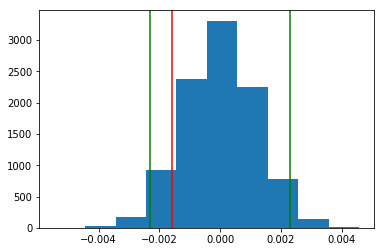

In [93]:
obs_diff= df2.query('group=="treatment"')['converted'].mean()-df2.query('group=="control"')['converted'].mean()
low=np.percentile(p_diffs,2.5)
upper=np.percentile(p_diffs,97.5)
plt.hist(p_diffs)
plt.axvline(x=obs_diff,c="red")
plt.axvline(x=low,c="green")
plt.axvline(x=upper,c="green");

In [94]:
print(low,upper,obs_diff)

-0.00230219783421 0.00230955020916 -0.00157905659769


The plot is what I expected to see a normal distribution of sample means. Based on the Central Limit Theorem, with a large enough sample size, the sampling distribution of the mean will be normally distributed.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [95]:
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)

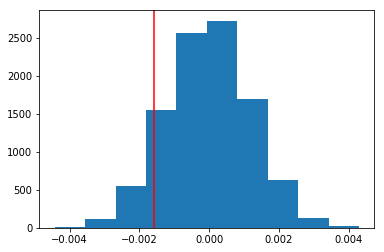

In [96]:
plt.hist(null_vals)
plt.axvline(x=obs_diff,c="red");

In [97]:
(null_vals>obs_diff).mean()

0.90139999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value calculated in the question above  is called p-value. <br>The interpretaion for this value:<br>
Since the p-value is 0.91 meaning 91 % chance that we obtain our observed statistic or a more extreme statistic from the null hypothesis. The p-value > alpha (0.05), which means we failed to reject the null (Pnew =< Pold) and suggests us the new page coverts better.     

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [98]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" & converted==1').shape[0]
convert_new = df2.query('landing_page=="new_page" & converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [99]:
from statsmodels.stats.proportion import proportions_ztest

In [100]:
counts=[convert_old,convert_new]
nobs=[n_old,n_new]
zscore, pval = proportions_ztest(counts, nobs,value=None,alternative='smaller',prop_var=False)
zscore,pval

(1.3116075339133115, 0.90517370514059103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The pvalue is very close with the finding in part j. It suggests that we failed to reject the null hypothesis meaning the old page is statistically better than the new page. <br>
The value of the z-score tells us how many standard deviations are away from the mean. When you run a feature pattern analysis tool and it yields small p-values and either a very high or a very low z-score, this indicates it is unlikely that the observed spatial pattern reflects the theoretical random pattern represented by your null hypothesis. However,our p-value is large and z-score here is small, so it seems like supporting our null hypothesis.
Both z-score and p-value share the same idea of hollding null hypothesis to be true.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [101]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [102]:
df2['intercept']=1
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2.drop(['control','new_page'],axis=1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
y=df2['converted']
X=df2[['ab_page']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
log_mod=LogisticRegression()
result=log_mod.fit(X_train,y_train)
y_preds=log_mod.predict(X_test)
print(precision_score(y_test,y_preds))
print(recall_score(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
confusion_matrix(y_test,y_preds)

0.0
0.0
0.880551301685


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[51175,     0],
       [ 6942,     0]])

In [104]:
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-20 22:23 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [105]:
np.exp(-0.0150)

0.98511193960306265

In [106]:
1/np.exp(-0.0150)

1.0151130646157189

The interpretation: <br>The new page is 1.015 less likely to have a user convert holding all other variable constant. 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

P-value of ab_page is 0.1897 which is not statistically significant in realting to the response variable.<br>
The p-value is different from the value found in Part II because the null hypothesis in A/B testing is the old page is equal or better than the new page while in regression, the p-value is tested if a parameter equal to 0 or different from 0.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We can add more factors to the model such as time variable. We can see if there is any impact from the time of the day or the day of the week that the user access the website on conversion. <br>
The disadvantage of adding additional terms to regression model is collinearity. The additional predictor variables might correlate with each other. Other disadvantages might be Change aversion or Novelty effect.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

In [107]:
df_country=pd.read_csv('countries.csv')
df_country.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [108]:
df3=df2.join(df_country.set_index('user_id'),on='user_id',how='inner')
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US


In [109]:
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [110]:
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US,0,0,1


In [111]:
model2=sm.Logit(df3['converted'],df3[['intercept','UK','CA']])
result2=model2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-20 22:23 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3154  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7462  0.4555  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5176  0.1291  -0.0935   0.0119
==================================================================

"""

In [112]:
np.exp(-0.0099), np.exp(-0.0408)

(0.99014884368295719, 0.96002111497165088)

In [113]:
1/np.exp(-0.0099), 1/np.exp(-0.0408)

(1.009949167117542, 1.0416437559600236)

We chose the baseline is US to compare with other countries:
- UK is 1.01 times more likely to convert
- CA is 1.04 times less likely to convert

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [114]:
df3['UK_newpage']=df3['UK']*df3['ab_page']
df3['CA_newpage']=df3['CA']*df3['ab_page']
df3['US_newpage']=df3['US']*df3['ab_page']
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page,country,CA,UK,US,UK_newpage,CA_newpage,US_newpage
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US,0,0,1,0,0,0


In [115]:
model3=sm.Logit(df3['converted'],df3[['intercept','UK_newpage','CA_newpage']])
result3=model3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-20 22:23 AIC:              212779.2932
No. Observations:   290585           BIC:              212811.0321
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0495  0.0000  -2.0084  -1.9841
UK_newpage    0.0149    0.0173     0.8620  0.3887  -0.0190   0.0488
CA_newpage   -0.0752    0.0376    -1.9973  0.0458  -0.1489  -0.0014
==================================================================

"""

In [116]:
np.exp(0.0149), np.exp(-0.0752)

(1.0150115583846535, 0.92755795618491998)

In [117]:
np.exp(0.0149), 1/np.exp(-0.0752)

(1.0150115583846535, 1.0780997492739288)

We chose US * new_page as baseline to compare with other countries <br>
- UK is 1.015 times more likely to convert
- CA is 1.078 times less likely to convert

### Conclusion: <br>
Among the 3 logistic regression models that we built above to predict user'sconverted decision, the first one is based on <i>new_page</i> as solely an independent variable while the second one tested whether the <i>country</i> where user lives have impact on conversion. Lastly, we created an interaction between country and page to see the effect of them on the model. 
- First model: The new page is 1.015 less likely to have a user convert holding all other variable constant. 
- Second model: 
   - UK is 1.01 times more likely to convert compared to US, holding all other variable constant.
   - CA is 1.04 times less likely to convert compared to US, holding all other variable constant.
- Third model:
   - The interaction between UK and new page users is 1.015 times more likely to convert compared to the interaction between new page users and US, holding all other variable constant.
   - The interaction between CA and new page users is 1.078 times less likely to convert compared to the interaction between new page users and US, holding all other variable constant.
However, the p-value of these variables are more than 0.05 which means they are not statistically significant. Therefore, the country factor does not have significant relationship with the conversion.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0